In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

Load data đã xử lí:

In [ ]:
with open("/content/drive/MyDrive/Data/train.pkl", "rb") as f:
    train_x, train_y = pickle.load(f)
with open("/content/drive/MyDrive/Data/test.pkl", "rb") as f:
    test_x, test_y = pickle.load(f)

Kiểm tra số lượng file đã load:

In [ ]:
print(len(train_x),len(test_x))

69266 41766


Sử dụng Hog để trích xuất đặc trưng trên file Train và Test:

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
import numpy as np
X_train_feature = []
for i in range(len(train_x)):
    feature = hog(train_x[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)
X_test_feature = []
for i in range(len(test_x)):
    feature1 = hog(test_x[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature1)
X_test_feature = np.array(X_test_feature,dtype = np.float32)

Kiểm tra số lượng file train và test là trích xuất thành công:

In [ ]:
print(len(X_train_feature), len(X_test_feature))

69266 41766


Import một số thư viện chuyên dụng:

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

Khảo sát score trên các Metric và các giá trị K khác nhau của K NEAREST NEIGHBORS :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
N = [11, 13, 15,  17, 19, 25]
Metric = ['euclidean', 'cosine', 'manhattan', 'minkowski']
for i in N:
  for j in Metric:
    KNeighbors = KNeighborsClassifier(n_neighbors= i, metric = j)
    KNeighbors.fit(X_train_feature,train_y)
    print( i, j, 'Precision',precision_score(test_y, KNeighbors.predict(X_test_feature), average = 'macro'))
    print( i, j, 'Recall' ,recall_score(test_y, KNeighbors.predict(X_test_feature), average = 'macro'))
    print( i, j, 'F1',f1_score(test_y, KNeighbors.predict(X_test_feature), average = 'macro'))
    print( i, j, 'Accuracy',accuracy_score(test_y, KNeighbors.predict(X_test_feature), normalize="True")

Train và kiểm tra model có score tốt nhất trên dữ liệu test:
      1. Tính toán và xuất ra các score trên từng nhãn.
      2. Biểu diễn các dự đoán của model thành ma trận.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     bicycle       0.00      0.00      0.00        20
         bus       0.52      0.33      0.40       665
         car       0.62      0.89      0.73      4664
       motor       0.98      0.82      0.89     32855
  pedestrian       0.25      0.01      0.02       108
    tricycle       0.13      0.22      0.16       545
       truck       0.26      0.57      0.35      2687
         van       0.25      0.25      0.25       222

    accuracy                           0.79     41766
   macro avg       0.37      0.39      0.35     41766
weighted avg       0.87      0.79      0.82     41766



[Text(0, 0, 'bicycle'),
 Text(0, 0, 'bus'),
 Text(0, 0, 'car'),
 Text(0, 0, 'motor'),
 Text(0, 0, 'pedestrian'),
 Text(0, 0, 'tricycle'),
 Text(0, 0, 'truck'),
 Text(0, 0, 'van')]

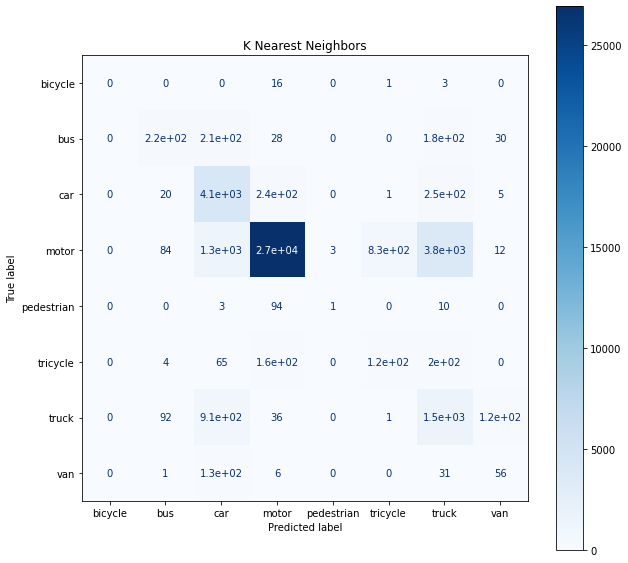

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier(n_neighbors = 11, metric = 'cosine')
KNeighbors.fit(X_train_feature,train_y)
#1
labels = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
report = classification_report(test_y, KNeighbors.predict(X_test_feature), target_names = labels)
print(report)
#2
Title = 'K Nearest Neighbors'
fig, ax = plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(KNeighbors, X_test_feature, test_y, cmap = plt.cm.Blues, ax = ax)
disp.ax_.set_title(Title)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

Khảo sát score trên các Slover của thuật toán LOGISTIC REGRESSION:

In [ ]:
from sklearn.linear_model import LogisticRegression
Solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in Solver:
  Logistic = LogisticRegression(solver = i)
  Logistic.fit(X_train_feature,train_y)
  print( i, 'Precision',precision_score(test_y, Logistic.predict(X_test_feature), average = 'macro'))
  print( i, 'Recall' ,recall_score(test_y, Logistic.predict(X_test_feature), average = 'macro'))
  print( i, 'F1',f1_score(test_y, Logistic.predict(X_test_feature), average = 'macro'))
  print( i, 'Accuracy',accuracy_score(test_y, Logistic.predict(X_test_feature), normalize="True")

Train và kiểm tra model có score tốt nhất trên dữ liệu test: 1. Tính toán và xuất ra các score trên từng nhãn. 2. Biểu diễn các dự đoán của model thành ma trận.

              precision    recall  f1-score   support

     bicycle       0.00      0.00      0.00        20
         bus       0.41      0.11      0.18       665
         car       0.61      0.80      0.69      4664
       motor       0.95      0.91      0.93     32855
  pedestrian       0.00      0.00      0.00       108
    tricycle       0.43      0.12      0.19       545
       truck       0.38      0.54      0.45      2687
         van       0.29      0.12      0.17       222

    accuracy                           0.85     41766
   macro avg       0.38      0.33      0.33     41766
weighted avg       0.86      0.85      0.85     41766



[Text(0, 0, 'bicycle'),
 Text(0, 0, 'bus'),
 Text(0, 0, 'car'),
 Text(0, 0, 'motor'),
 Text(0, 0, 'pedestrian'),
 Text(0, 0, 'tricycle'),
 Text(0, 0, 'truck'),
 Text(0, 0, 'van')]

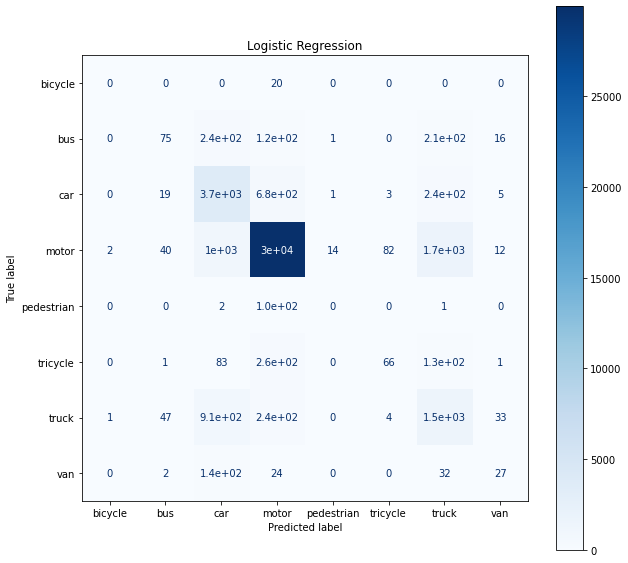

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(solver = 'liblinear')
Logistic.fit(X_train_feature,train_y)
#1
labels = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
report = classification_report(test_y, Logistic.predict(X_test_feature), target_names = labels)
print(report)
#2
Title = "Logistic Regression"
fig, ax = plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(Logistic, X_test_feature, test_y, cmap = plt.cm.Blues, ax = ax)
disp.ax_.set_title(Title)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

Khảo sát score trên các Kernel của thuật toán  Support Vector Machine

In [ ]:
from sklearn.svm import SVC
Math = ['sigmoid', 'poly', 'rbf', 'linear']
for i in Math:
  SupportVector = SVC(kernel = i)
  SupportVector.fit(X_tr, Y_trai)
  print( i, 'Precision',precision_score(test_y, SupportVector.predict(X_test_feature), average = 'macro'))
  print( i, 'Recall' ,recall_score(test_y, SupportVector.predict(X_test_feature), average = 'macro'))
  print( i, 'F1',f1_score(test_y, SupportVector.predict(X_test_feature), average = 'macro'))
  print( i, 'Accuracy',accuracy_score(test_y, SupportVector.predict(X_test_feature), normalize="True")

Train và kiểm tra model có score tốt nhất trên dữ liệu test: 1. Tính toán và xuất ra các score trên từng nhãn. 2. Biểu diễn các dự đoán của model thành ma trận.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     bicycle       0.00      0.00      0.00        20
         bus       0.86      0.23      0.36       665
         car       0.66      0.88      0.76      4664
       motor       0.97      0.95      0.96     32855
  pedestrian       0.00      0.00      0.00       108
    tricycle       0.76      0.17      0.28       545
       truck       0.58      0.61      0.59      2687
         van       0.36      0.23      0.28       222

    accuracy                           0.89     41766
   macro avg       0.52      0.38      0.40     41766
weighted avg       0.90      0.89      0.89     41766



[Text(0, 0, 'bicycle'),
 Text(0, 0, 'bus'),
 Text(0, 0, 'car'),
 Text(0, 0, 'motor'),
 Text(0, 0, 'pedestrian'),
 Text(0, 0, 'tricycle'),
 Text(0, 0, 'truck'),
 Text(0, 0, 'van')]

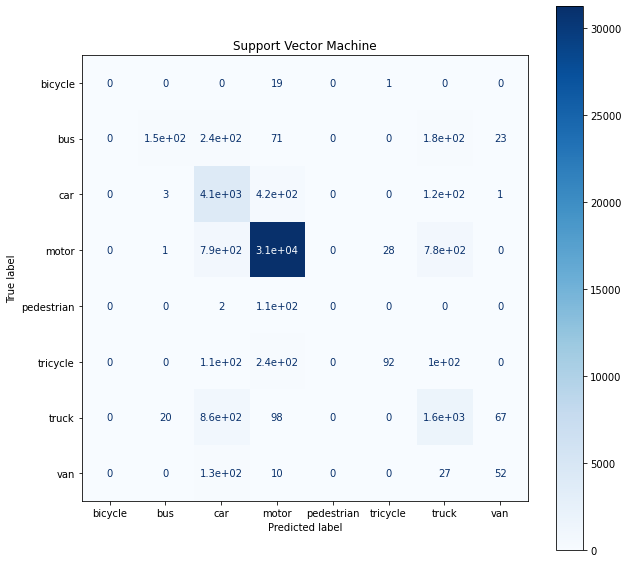

In [ ]:
from sklearn.svm import SVC
SupportVector = SVC(kernel = 'rbf')
SupportVector.fit(X_train_feature,train_y)
#1
labels = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
report = classification_report(test_y, SupportVector.predict(X_test_feature), target_names = labels)
print(report)
#2
Title = "Support Vector Machine"
fig, ax = plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(SupportVector, X_test_feature, test_y, cmap = plt.cm.Blues, ax = ax)
disp.ax_.set_title(Title)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

Khảo sát score trên các thuật toán Naive Bayes khác nhau

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

#Gaussian Naive Bayes
Gaussian = GaussianNB()
Gaussian.fit(X_train_feature, train_y)
print('Precision', precision_score(test_y, Gaussian.predict(X_test_feature), average = 'macro'))
print('Recall', recall_score(test_y, Gaussian.predict(X_test_feature), average = 'macro'))
print('F1', f1_score(test_y, Gaussian.predict(X_test_feature), average = 'macro'))
print('Accuracy', accuracy_score(test_y, Gaussian.predict(X_test_feature), normalize="True")

#Multinomia Naive Bayes
Multinomia = MultinomialNB()
Multinomia.fit(X_train_feature, train_y)
print('Precision', precision_score(test_y, Multinomia.predict(X_test_feature), average = 'macro'))
print('Recall', recall_score(test_y, Multinomia.predict(X_test_feature), average = 'macro'))
print('F1', f1_score(test_y, Multinomia.predict(X_test_feature), average = 'macro'))
print('Accuracy', accuracy_score(test_y, Multinomia.predict(X_test_feature), normalize="True")

#Bernoulli Naive Bayes
Bernoulli = BernoulliNB()
Bernoulli.fit(X_train_feature, train_y)
print('Precision', precision_score(test_y, Bernoulli.predict(X_test_feature), average = 'macro'))
print('Recall', recall_score(test_y, Bernoulli.predict(X_test_feature), average = 'macro'))
print('F1', f1_score(test_y, Bernoulli.predict(X_test_feature), average = 'macro'))
print('Accuracy', accuracy_score(test_y, Bernoulli.predict(X_test_feature), normalize="True")

#Complement Naive Bayes
Complement = ComplementNB()
Complement.fit(X_train_feature, train_y)
print('Precision', precision_score(test_y, Complement.predict(X_test_feature), average = 'macro'))
print('Recall', recall_score(test_y, Complement.predict(X_test_feature), average = 'macro'))
print('F1', f1_score(test_y, Complement.predict(X_test_feature), average = 'macro'))
print('Accuracy', accuracy_score(test_y, Complement.predict(X_test_feature), normalize="True")

Train và kiểm tra model có score tốt nhất trên dữ liệu test: 1. Tính toán và xuất ra các score trên từng nhãn. 2. Biểu diễn các dự đoán của model thành ma trận.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     bicycle       0.00      0.00      0.00        20
         bus       0.50      0.00      0.01       665
         car       0.48      0.62      0.54      4664
       motor       0.91      0.81      0.86     32855
  pedestrian       0.00      0.00      0.00       108
    tricycle       0.00      0.00      0.00       545
       truck       0.13      0.31      0.18      2687
         van       0.00      0.00      0.00       222

    accuracy                           0.73     41766
   macro avg       0.25      0.22      0.20     41766
weighted avg       0.79      0.73      0.75     41766



[Text(0, 0, 'bicycle'),
 Text(0, 0, 'bus'),
 Text(0, 0, 'car'),
 Text(0, 0, 'motor'),
 Text(0, 0, 'pedestrian'),
 Text(0, 0, 'tricycle'),
 Text(0, 0, 'truck'),
 Text(0, 0, 'van')]

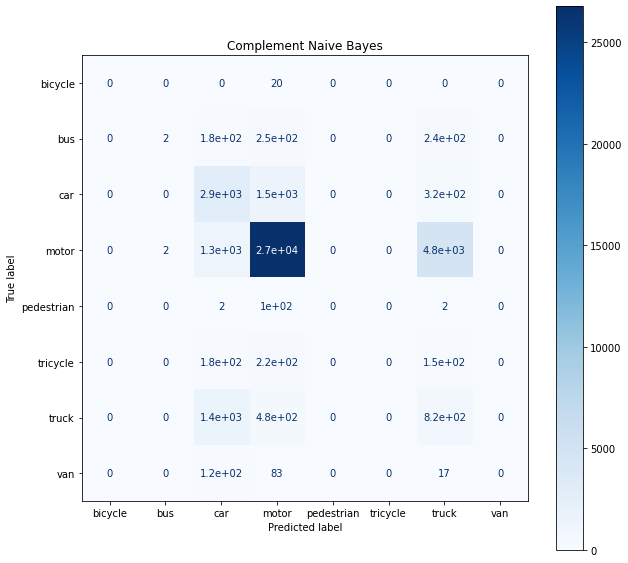

In [ ]:
from sklearn.naive_bayes import ComplementNB
Complement = ComplementNB()
Complement.fit(X_train_feature, train_y)
#1
labels = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
report = classification_report(test_y, Complement.predict(X_test_feature), target_names = labels)
print(report)
#2
Title = "Complement Naive Bayes"
fig, ax = plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(Complement, X_test_feature, test_y, cmap = plt.cm.Blues, ax = ax)
disp.ax_.set_title(Title)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

Khảo sát score trên các tiêu chuẩn và số lượng cây của thuật toán Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
A = [5, 10, 15, 20, 25, 30]
Criterion = ['gini','entropy']
for i in A:
  for j in Criterion:
    RandomForest = RandomForestClassifier(n_estimators = i, criterion = j , random_state = 0)
    RandomForest.fit(X_train_feature, train_y)
    print(i ,j , 'Precision', precision_score(test_y, RandomForest.predict(X_test_feature), average = 'macro'))
    print(i ,j , 'Recall', recall_score(test_y, RandomForest.predict(X_test_feature), average = 'macro'))
    print(i ,j , 'F1', f1_score(test_y, RandomForest.predict(X_test_feature), average = 'macro'))
    print(i ,j , 'Accuracy', accuracy_score(test_y, RandomForest.predict(X_test_feature), normalize="True")

Train và kiểm tra model có score tốt nhất trên dữ liệu test: 1. Tính toán và xuất ra các score trên từng nhãn. 2. Biểu diễn các dự đoán của model thành ma trận

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     bicycle       0.00      0.00      0.00        20
         bus       0.92      0.03      0.07       665
         car       0.68      0.71      0.69      4664
       motor       0.93      0.98      0.95     32855
  pedestrian       0.00      0.00      0.00       108
    tricycle       0.00      0.00      0.00       545
       truck       0.55      0.46      0.50      2687
         van       0.49      0.14      0.22       222

    accuracy                           0.88     41766
   macro avg       0.45      0.29      0.30     41766
weighted avg       0.86      0.88      0.86     41766



[Text(0, 0, 'bicycle'),
 Text(0, 0, 'bus'),
 Text(0, 0, 'car'),
 Text(0, 0, 'motor'),
 Text(0, 0, 'pedestrian'),
 Text(0, 0, 'tricycle'),
 Text(0, 0, 'truck'),
 Text(0, 0, 'van')]

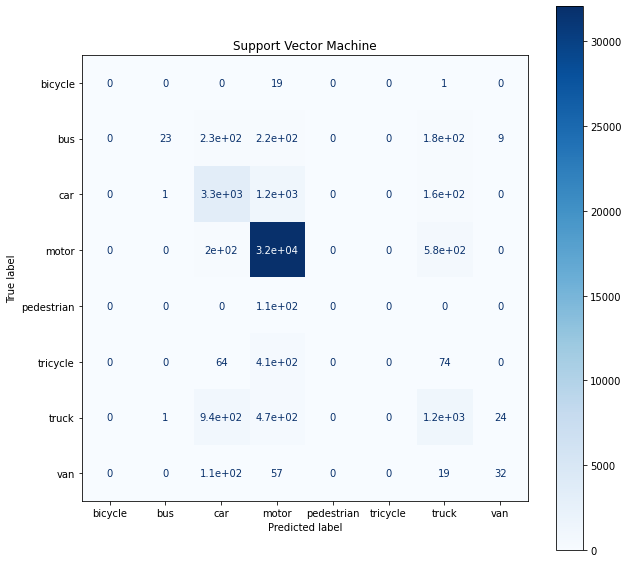

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 30, criterion = 'gini' , random_state = 0)
RandomForest.fit(X_train_feature, train_y)
#1
labels = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
report = classification_report(test_y, RandomForest.predict(X_test_feature), target_names = labels)
print(report)
#2
Title = "Support Vector Machine"
fig, ax = plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(RandomForest, X_test_feature, test_y, cmap = plt.cm.Blues, ax = ax)
disp.ax_.set_title(Title)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rescale=1/255)
test_generator=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=train_generator.flow_from_directory(
   "/content/drive/MyDrive/Data/UIT-VC/Train",
    target_size=(32,32),batch_size=32,
    class_mode="categorical", shuffle=False,
    seed=42)

Found 69268 images belonging to 8 classes.


In [ ]:
test_data=test_generator.flow_from_directory(
   "/content/drive/MyDrive/Data/UIT-VC/Test",
    target_size=(32,32),batch_size=32,
    class_mode="categorical", shuffle=False,
    seed=42
)

Found 41768 images belonging to 8 classes.


In [ ]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs=1, validation_data=test_data)

KeyboardInterrupt: ignored

Load Model

In [ ]:
import tensorflow as tf
model1=tf.keras.models.load_model("/content/drive/MyDrive/nxzn.h")

Label Map

In [ ]:
class_name=["bicycle","bus","car","motor","pedestrian","tricycle","truck","van"]

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path="./"+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)/255
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model1.predict(images)
  final=np.argmax(classes)
  print(class_name[final])

Saving vd00117.jpg to vd00117.jpg
truck


Test ảnh